# NYC Trips: Tip Analysis

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
df = pd.read_csv('data/taxi_clean.csv')
df

/home/jovyan/envs/hw7env/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3251: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,total_amount,payment_type,trip_type,congestion_surcharge,day_of_week,day_of_month,hour_of_day,trip_duration,total_without_tip,fare_per_mile
0,1.0,2021-07-01 00:30:52,2021-07-01 00:35:36,N,1.0,74,168,1.0,1.20,6.00,...,7.30,2.0,1.0,0.0,3,1,0,284.0,7.30,6.08
1,2.0,2021-07-01 00:25:36,2021-07-01 01:01:31,N,1.0,116,265,2.0,13.69,42.00,...,43.30,2.0,1.0,0.0,3,1,0,2155.0,43.30,3.16
2,2.0,2021-07-01 00:05:58,2021-07-01 00:12:00,N,1.0,97,33,1.0,0.95,6.50,...,10.14,1.0,1.0,0.0,3,1,0,362.0,7.80,8.21
3,2.0,2021-07-01 00:41:40,2021-07-01 00:47:23,N,1.0,74,42,1.0,1.24,6.50,...,7.80,2.0,1.0,0.0,3,1,0,343.0,7.80,6.29
4,2.0,2021-07-01 00:51:32,2021-07-01 00:58:46,N,1.0,42,244,1.0,1.10,7.00,...,8.30,2.0,1.0,0.0,3,1,0,434.0,8.30,7.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80231,NaN,2021-07-02 07:59:00,2021-07-02 08:33:00,NaN,NaN,218,169,NaN,18.04,50.24,...,59.84,NaN,NaN,NaN,4,2,7,2040.0,59.84,3.32
80232,NaN,2021-07-02 07:02:00,2021-07-02 07:18:00,NaN,NaN,74,137,NaN,5.56,19.16,...,25.87,NaN,NaN,NaN,4,2,7,960.0,22.21,3.99
80233,NaN,2021-07-02 07:53:00,2021-07-02 08:15:00,NaN,NaN,69,75,NaN,5.13,22.45,...,22.75,NaN,NaN,NaN,4,2,7,1320.0,22.75,4.43
80234,NaN,2021-07-02 07:58:00,2021-07-02 08:30:00,NaN,NaN,117,82,NaN,12.58,48.62,...,54.12,NaN,NaN,NaN,4,2,7,1920.0,54.12,4.30


In [116]:
df.describe()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,...,total_amount,payment_type,trip_type,congestion_surcharge,day_of_week,day_of_month,hour_of_day,trip_duration,total_without_tip,fare_per_mile
count,22090.000000,22090.000000,22090.000000,22090.000000,22090.000000,22090.000000,22090.000000,22090.000000,22090.000000,22090.000000,...,22090.000000,22090.0,22090.000000,22090.000000,22090.000000,22090.000000,22090.000000,22090.000000,22090.000000,22090.000000
mean,1.873472,1.073834,92.418877,144.274830,1.325034,3.168545,13.262127,0.436974,0.492010,3.110229,...,18.722846,1.0,1.014622,1.044330,2.990222,16.290584,13.988094,1205.748257,15.612617,8.854290
std,0.332451,0.523026,59.704002,78.030283,1.018376,3.248590,10.153360,0.723090,0.062701,2.968427,...,13.289800,0.0,0.120037,1.334656,1.863341,8.957891,5.072278,5364.732727,11.004034,66.981861
min,1.000000,1.000000,6.000000,1.000000,0.000000,0.010000,2.500000,0.000000,0.000000,0.010000,...,3.310000,1.0,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,3.300000,0.430000
25%,2.000000,1.000000,65.000000,74.000000,1.000000,1.350000,7.500000,0.000000,0.500000,1.750000,...,11.000000,1.0,1.000000,0.000000,1.000000,9.000000,10.000000,463.000000,8.800000,4.670000
50%,2.000000,1.000000,75.000000,142.000000,1.000000,2.200000,10.500000,0.000000,0.500000,2.450000,...,15.360000,1.0,1.000000,0.000000,3.000000,16.000000,14.000000,713.000000,12.800000,5.670000
75%,2.000000,1.000000,97.000000,234.000000,1.000000,3.790000,15.500000,1.000000,0.500000,3.660000,...,22.050000,1.0,1.000000,2.750000,4.000000,24.000000,18.000000,1073.000000,18.550000,6.920000
max,2.000000,5.000000,265.000000,265.000000,7.000000,109.870000,359.500000,4.500000,0.500000,87.710000,...,443.370000,1.0,2.000000,2.750000,6.000000,31.000000,23.000000,86170.000000,369.800000,4676.670000


## Filtering Out Null Values

In [111]:
df = df[df.tip_amount > 0]
df = df[df.fare_amount > 0]
df = df[df.passenger_count.notnull()]
df.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'payment_type', 'trip_type', 'congestion_surcharge', 'day_of_week',
       'day_of_month', 'hour_of_day', 'trip_duration', 'total_without_tip',
       'fare_per_mile'],
      dtype='object')

## Groupby Averages, Unique Values

In [119]:
distance_avgs = df.groupby('trip_distance').mean()
fare_avgs = df.groupby('fare_amount').mean()
day_avgs = df.groupby('day_of_week').mean()

# duration_avgs = df.groupby('trip_duration').mean()
# passenger_avgs = df.groupby('passenger_count').mean()
# vendor_avgs = df.groupby('VendorID').mean()


def unique_values(col_name):
    output = df[col_name].unique()
    output.sort()
    return output


tips = unique_values('tip_amount')
distances = unique_values('trip_distance')
vendors = unique_values('VendorID')
fare_amounts = unique_values('fare_amount')
days = unique_values('day_of_week')



,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,...,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,day_of_month,hour_of_day,trip_duration,total_without_tip,fare_per_mile
day_of_week,,,,,,,,,,,,,,,,,,,,,
0,1.865650,1.061680,93.021269,146.448423,1.295994,3.246976,13.206211,0.467210,0.494328,3.106023,...,0.300000,18.725920,1.0,1.009926,1.072315,16.282878,14.063807,1372.901808,15.619897,6.634963
1,1.867294,1.056078,93.621735,145.414141,1.309300,3.106865,13.007147,0.504789,0.494079,3.148830,...,0.299687,18.603312,1.0,1.011146,1.080460,16.096482,13.709161,1095.547544,15.454483,7.419335
2,1.871364,1.059147,94.529735,142.670330,1.312217,3.176328,13.276952,0.534906,0.494021,3.170750,...,0.299903,18.953361,1.0,1.010989,1.133242,17.457014,13.964447,1015.951519,15.782612,8.234560
3,1.869253,1.064988,92.488312,145.640894,1.317236,3.068112,13.327264,0.498908,0.492936,3.136309,...,0.299923,18.896340,1.0,1.011816,1.081492,15.330850,13.765476,1330.242230,15.760031,8.660712
4,1.876350,1.069666,91.756812,142.743702,1.352185,3.099177,13.155380,0.527571,0.492545,3.069409,...,0.299846,18.618877,1.0,1.013368,0.992545,15.793059,14.276607,1192.947558,15.549468,9.315614
5,1.886647,1.108309,90.107715,140.014837,1.352226,3.224309,13.462881,0.227448,0.487092,3.042027,...,0.299911,18.573377,1.0,1.024926,0.939985,17.731157,14.014837,1156.472700,15.531350,9.112798
6,1.876801,1.104138,91.679684,149.182241,1.324965,3.356662,13.415100,0.218271,0.488377,3.110646,...,0.300000,18.654984,1.0,1.021850,1.021385,15.261739,14.134356,1281.655044,15.544338,13.682645


## Line Graph: Distance vs Tips

(0.0, 50.0)

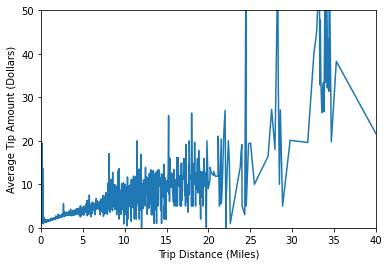

In [113]:
x = distances
y = distance_avgs['tip_amount']
plt.plot(x,y)
plt.xlabel('Trip Distance (Miles)')
plt.ylabel('Average Tip Amount (Dollars)')
plt.xlim([0,40])
plt.ylim([0,50])

## Scatter Plot: Distance vs Tips

/home/jovyan/envs/hw7env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0.6918933597560907

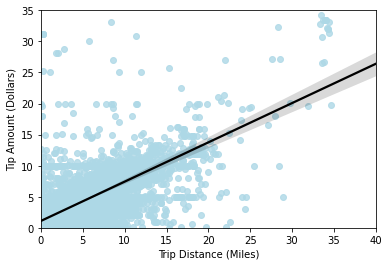

In [114]:
x = df['trip_distance']
y = df['tip_amount']
sns.regplot(x, y, scatter_kws={"color": "lightblue"}, line_kws={"color": "black"})
plt.xlabel('Trip Distance (Miles)')
plt.ylabel('Tip Amount (Dollars)')
plt.xlim([0,40])
plt.ylim([0,35])
np.corrcoef(x,y)[0][1]

## Line Graph: Tests

(0.0, 50.0)

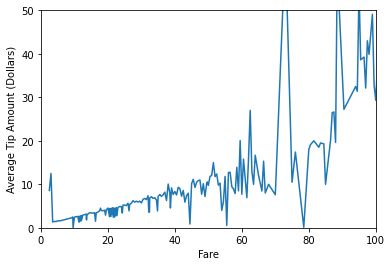

In [123]:
x = fare_amounts
y = fare_avgs['tip_amount']
plt.plot(x,y)
plt.xlabel('Total Fare Amount (Dollars)')
plt.ylabel('Average Tip Amount (Dollars)')
plt.xlim([0,100])
plt.ylim([0,50])

## Scatter Plot: Tests

/home/jovyan/envs/hw7env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0.7107785452957002

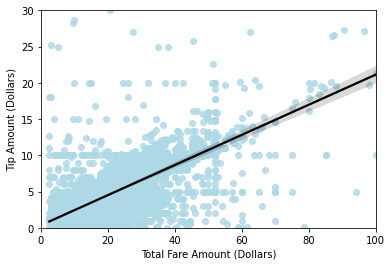

In [127]:
x = df['fare_amount']
y = df['tip_amount']
sns.regplot(x, y, scatter_kws={"color": "lightblue"}, line_kws={"color": "black"})
plt.xlabel('Total Fare Amount (Dollars)')
plt.ylabel('Tip Amount (Dollars)')
plt.xlim([0,100])
plt.ylim([0,30])
np.corrcoef(x,y)[0][1]

## Bar Graph (Tips by Day of Week)

<BarContainer object of 7 artists>

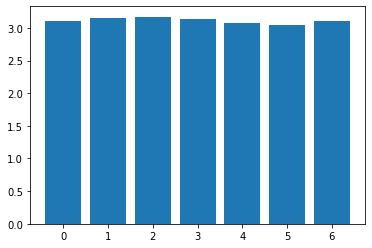

In [128]:
x = days
y = day_avgs['tip_amount']
plt.bar(x,y)